In [2]:
import configparser
import pymysql
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [52]:
def create_connection():
    config = configparser.ConfigParser()
    config.read('../config_db/config.ini')
    host = config['mysql']['host']
    user = config['mysql']['user']
    password = config['mysql']['password']
    database = config['mysql']['database']
    try:
        conn = pymysql.connect(
            host=host,
            user=user,
            password=password,
            database=database
        )
        print("Successful Connection")
        cursor = conn.cursor()
        return conn, cursor
    except pymysql.Error as e:
        print("Connection Error:", e)
        return None, None

def query_db(db_table):
    conn, cursor = create_connection()
    cursor.execute(db_table)
    rows = cursor.fetchall()
    columns = [desc[0] for desc in cursor.description]
    df = pd.DataFrame(rows, columns=columns)
    conn.close()
    return df

In [53]:
db_table = ('SELECT * FROM grammy')
grammy = query_db(db_table)

Successful Connection


In [54]:
grammy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4810 entries, 0 to 4809
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   year          4810 non-null   int64         
 1   title         4810 non-null   object        
 2   published_at  4810 non-null   datetime64[ns]
 3   updated_at    4810 non-null   datetime64[ns]
 4   category      4810 non-null   object        
 5   nominee       4810 non-null   object        
 6   artist        4810 non-null   object        
 7   workers       4810 non-null   object        
 8   img           4810 non-null   object        
 9   winner        4810 non-null   int64         
dtypes: datetime64[ns](2), int64(2), object(6)
memory usage: 375.9+ KB


I will replace the missing data with NaN

In [55]:
grammy.replace('', np.nan, inplace=True)
grammy.replace(['', 'NA'], np.nan, inplace=True)

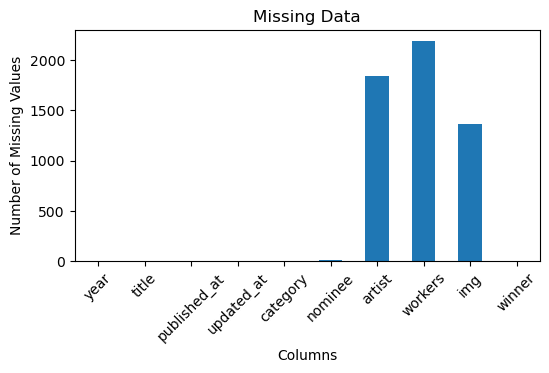

In [56]:
missing_data = grammy.isna().sum()
plt.figure(figsize=(6, 3))
missing_data.plot(kind='bar')
plt.title('Missing Data')
plt.xlabel('Columns')
plt.ylabel('Number of Missing Values')
plt.xticks(rotation=45)
plt.show()


The workers column has the largest amount of missing data so it is not so relevant to use it, from the artist column we are only going to work with the data we have other than NaN.

In [57]:
grammy.duplicated().sum()

0

In [58]:
grammy.nunique()

year              62
title             62
published_at       4
updated_at        10
category         638
nominee         4131
artist          1658
workers         2366
img             1463
winner             1
dtype: int64

Data Analysis

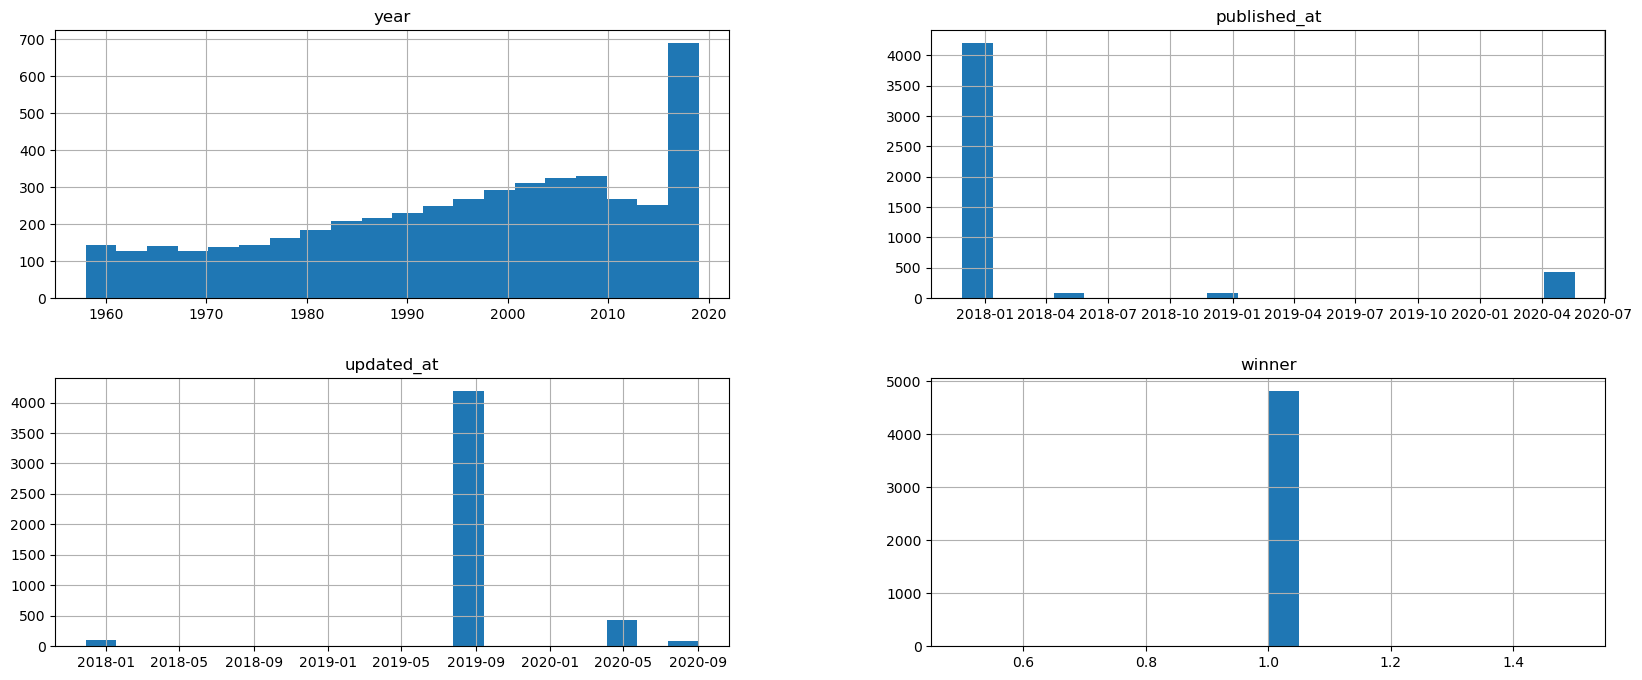

In [59]:
grammy.hist(figsize=(20, 8), bins=20)
plt.show()

Here you can see that the winner column lists everyone as a winner when they are only nominated.

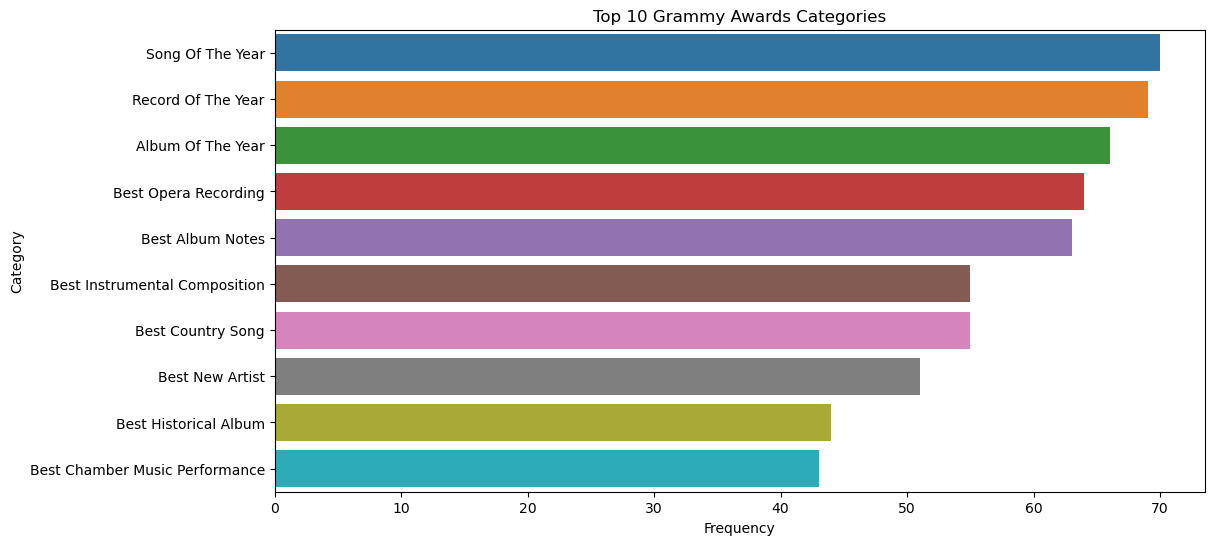

In [60]:
top_categories = grammy['category'].value_counts().head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_categories.values, y=top_categories.index)
plt.title('Top 10 Grammy Awards Categories')
plt.xlabel('Frequency')
plt.ylabel('Category')
plt.show()

The most common categories at the Grammy Awards

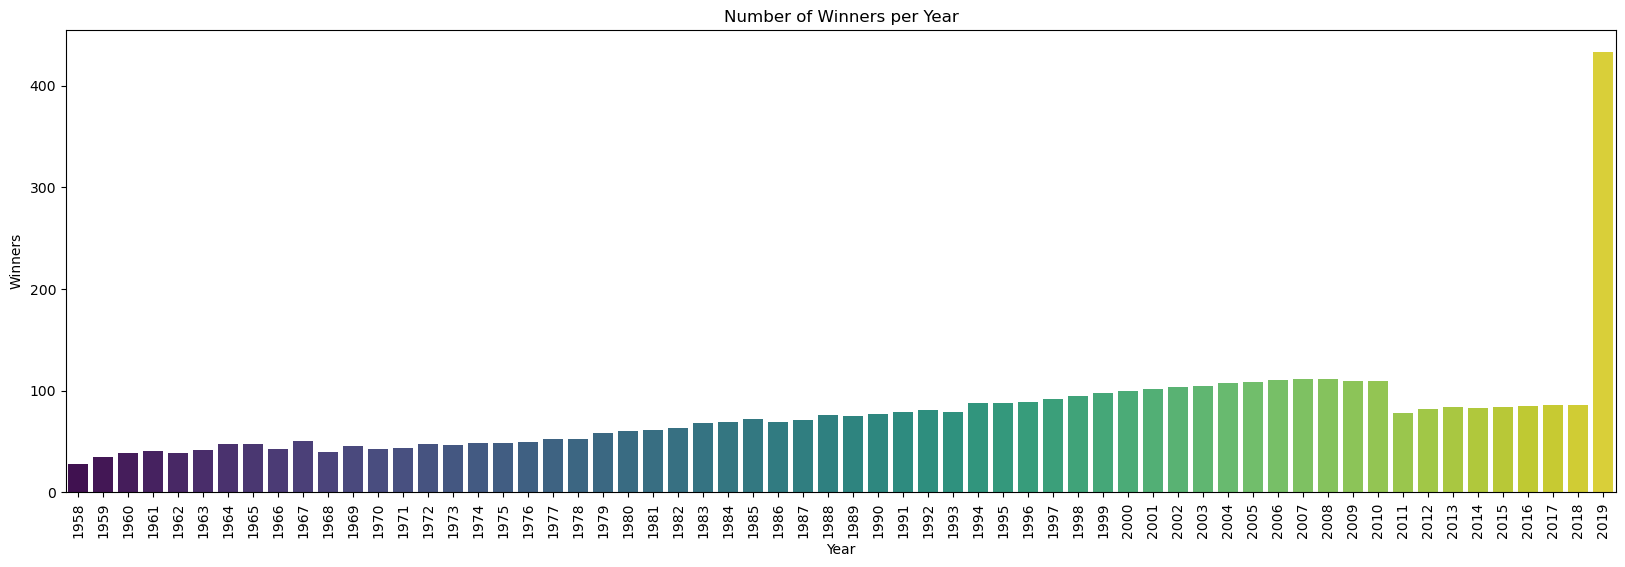

In [61]:
winners_count_by_year = grammy.groupby('year')['winner'].sum().reset_index()

plt.figure(figsize=(20, 6))
sns.barplot(x='year', y='winner', data=winners_count_by_year, palette='viridis')
plt.xticks(rotation=90)
plt.title('Number of Winners per Year')
plt.xlabel('Year')
plt.ylabel('Winners')
plt.show()